# Notebook for Figure S2A
#### Written by: Kate Johnson

## Requires the following inputs to run: 

### A working directory path

### File path to R functions: 
- maf_functions.R

### "Golden" files from simulation: 
- H1N1-7_agitated_thompson_af_data.csv
- H3N2-4_thirsty_volta_af_data.csv
- Vic-3_fervent_raman_af_data.csv
- SARS-CoV2-3_kickass_mcclintock_af_data.csv


### Coverage .tsv files from simulated data: 
- H1N1-7_agitated_cov_data.tsv
- H3N2-4_thirsty_volta_cov_data.tsv
- Vic-3_fervent_raman_cov_data.tsv
- SARS-CoV2-3_cov_data.tsv

### Metadata that contains segment/genome size information for A/H1N1, A/H3N2, B/Victoria, and SARS-CoV-2: 
- SegmentSize.maf.csv

### Portions of the code that the user will have to change are highlighted with "USER WILL NEED TO UPDATE" comments.

## Outputs figure S2A

In [1]:
library('plyr')
library('dplyr')
library('tidyverse')
library("plotrix") 
library('ggplot2')
library('glue')
#library("RColorBrewer")
#library('plotly')
#library('gridExtra')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::m

In [2]:
binocheck = 'wBino'

In [3]:
message("set working directory and file names")

wkdir = "/home/kate/Lab/MAF/reports/double_reports"  # USER WILL NEED TO UPDATE - work directory is set to directory where reports are located

h1n1_af_report = 'H1N1-7_agitated_thompson_af_data.csv' # h1n1
h3n2_af_report = 'H3N2-4_thirsty_volta_af_data.csv' # h3n2
vict_af_report = 'Vic-3_fervent_raman_af_data.csv' # h3n2
sars_af_report  = 'SARS-CoV2-3_kickass_mcclintock_af_data.csv'


h1n1_cov = 'H1N1-7_agitated_cov_data.tsv'# h1n1
h3n2_cov = 'H3N2-4_thirsty_volta_cov_data.tsv' # h3n2
vict_cov = 'Vic-3_fervent_raman_cov_data.tsv' # h3n2
sars_cov  = 'SARS-CoV2-3_cov_data.tsv'

segment_sizes = '../../metadata/SegmentSize.maf.csv'  # USER WILL NEED TO UPDATE

info = 'all'

set working directory and file names



In [4]:
source(glue('{wkdir}/../../scripts/maf_functions.R'))  # USER WILL NEED TO UPDATE

In [5]:
message("Set working directory and read in sim data")

setwd(wkdir) 

sizes = read.csv(segment_sizes,header = T)

# input the golden files:
h1n1_af = read.csv(h1n1_af_report,header = T)
h3n2_af = read.csv(h3n2_af_report,header = T)
vict_af = read.csv(vict_af_report,header = T)
sars_af = read.csv(sars_af_report, header = T)

Set working directory and read in sim data



In [6]:
# USER MAY WANT TO UPDATE
if (!dir.exists(glue("{wkdir}/../double_report_figures"))) {
      dir.create(glue("{wkdir}/../double_report_figures"))
    }

FIG_DIR = glue("{wkdir}/../double_report_figures")

In [7]:
message("Combine h3n2 and h1n1 data")
h1n1_af$strain = 'H1N1'
h3n2_af$strain = 'H3N2'
vict_af$strain = 'VICT'
sars_af$strain = 'SARS'
sars_af$chrom = 'SARS_SARS'

Combine h3n2 and h1n1 data



In [8]:
sars_af = rearrange_output_data(df = sars_af, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'm1' & parameter2 != 'filtered') %>%
        unique()

sars_af$seg_pos = paste0(sars_af$chrom, '_', sars_af$pos)  # adding segment position information

sars_cv = read.table(sars_cov, header = T, sep = '\t') %>%
            rowwise() %>%
            ungroup() %>%
            filter(ntpos %in% c(levels(factor(sars_af$pos)))) %>%
            unique()

sars_cv = rearrange_coverage(sars_cv, cov_id_list) %>% 
            unique() %>%
            select(-segment)

# generate new column variable with tool and parameters 1 and 2 for each caller
sars_af$tool_params = paste0(sars_af$tool, '_', sars_af$parameter,'_', sars_af$parameter2)
sars_af = sars_af %>% filter(tool_params %in% keep_tool_params)  # removing - will keep var info for no-binocheck - but won't add coverage

sars_af = merge(sars_af, sars_cv %>% select(-name), 
                by.x = c("pos",
                         "virus",'rep',"AF","allele_freq",
                    "frac","seq_depth","aligner"),
                by.y = c("ntpos",
                         "virus",'rep',"AF","allele_freq",
                    "frac","seq_depth","aligner"),
               all.x = TRUE)

Warning message:
“Expected 10 pieces. Missing pieces filled with `NA` in 471417 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [9]:
message("Clean-up")
rm(sars_cv)
gc()

Clean-up



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1125532,60.2,36341401,1940.9,59107748,3156.7
Vcells,48283122,368.4,194713337,1485.6,241859043,1845.3


In [10]:
h1n1_af = rearrange_output_data(df = h1n1_af, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'm1' & parameter2 != 'filtered') %>%
        unique()

h1n1_af$tool_params = paste0(h1n1_af$tool, '_', h1n1_af$parameter,'_', h1n1_af$parameter2)

h1n1_af = h1n1_af %>% filter(tool_params %in% keep_tool_params)

h1n1_af$seg_pos = paste0(h1n1_af$chrom, '_', h1n1_af$pos)

h1n1_cv = read.table(h1n1_cov, header = T, sep = '\t') %>%
            rowwise() %>%
            mutate(seg_pos = paste0(segment,'_',ntpos)) %>% 
            ungroup() %>%
            filter(seg_pos %in% c(levels(factor(h1n1_af$seg_pos)))) %>%
            unique()
            
h1n1_cv = rearrange_coverage(h1n1_cv, cov_id_list) %>% 
            filter(rep == 'm1') %>% 
            unique()

h1n1_af = merge(h1n1_af, h1n1_cv %>% select(-name), 
                by.x = c("chrom","pos","seg_pos",
                         "virus",'rep',"AF","allele_freq",
                    "frac","seq_depth","aligner"),
                by.y = c("segment","ntpos","seg_pos",
                         "virus",'rep',"AF","allele_freq",
                    "frac","seq_depth","aligner"),
               all.x = TRUE)

Warning message:
“Expected 10 pieces. Missing pieces filled with `NA` in 393417 rows [125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, ...].”


In [11]:
message("Clean-up")
rm(h1n1_cv)
gc()

Clean-up



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1134204,60.6,29073122,1552.7,59107748,3156.7
Vcells,22437755,171.2,155770670,1188.5,241859043,1845.3


In [12]:
h3n2_af = rearrange_output_data(df = h3n2_af, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'm1' & parameter2 != 'filtered') %>%
        unique()

h3n2_af$tool_params = paste0(h3n2_af$tool, '_', h3n2_af$parameter,'_', h3n2_af$parameter2)

h3n2_af = h3n2_af %>% filter(tool_params %in% keep_tool_params)

h3n2_af$seg_pos = paste0(h3n2_af$chrom, '_', h3n2_af$pos)

h3n2_cv = read.table(h3n2_cov, header = T, sep = '\t') %>%
            rowwise() %>%
            mutate(seg_pos = paste0(segment,'_',ntpos)) %>% 
            ungroup() %>%
            filter(seg_pos %in% c(levels(factor(h3n2_af$seg_pos)))) %>%
            unique()
            
h3n2_cv = rearrange_coverage(h3n2_cv, cov_id_list) %>% 
            unique()


h3n2_af = merge(h3n2_af, h3n2_cv %>% select(-name), 
                by.x = c("chrom","pos","seg_pos",
                         "virus",'rep',"AF","allele_freq",
                    "frac","seq_depth","aligner"),
                by.y = c("segment","ntpos","seg_pos",
                         "virus",'rep',"AF","allele_freq",
                    "frac","seq_depth","aligner"),
               all.x = TRUE)

Warning message:
“Expected 10 pieces. Missing pieces filled with `NA` in 357820 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [13]:
message("Clean-up")
rm(h3n2_cv)
gc()

Clean-up



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1130139,60.4,18606799,993.8,59107748,3156.7
Vcells,19536109,149.1,124616536,950.8,241859043,1845.3


In [14]:
vict_af = rearrange_output_data(df = vict_af, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'm1' & parameter2 != 'filtered') %>%
        unique()

vict_af$tool_params = paste0(vict_af$tool, '_', vict_af$parameter,'_', vict_af$parameter2)

vict_af = vict_af %>% filter(tool_params %in% keep_tool_params)

vict_af$seg_pos = paste0(vict_af$chrom, '_', vict_af$pos)

vict_cv = read.table(vict_cov, header = T, sep = '\t') %>%
            rowwise() %>%
            mutate(seg_pos = paste0(segment,'_',ntpos)) %>% 
            ungroup() %>%
            filter(seg_pos %in% c(levels(factor(vict_af$seg_pos)))) %>%
            unique()
            
vict_cv = rearrange_coverage(vict_cv, cov_id_list) %>% 
            unique()


vict_af = merge(vict_af, vict_cv %>% select(-name), 
                by.x = c("chrom","pos","seg_pos",
                         "virus",'rep',"AF","allele_freq",
                    "frac","seq_depth","aligner"),
                by.y = c("segment","ntpos","seg_pos",
                         "virus",'rep',"AF","allele_freq",
                    "frac","seq_depth","aligner"),
               all.x = TRUE)

Warning message:
“Expected 10 pieces. Missing pieces filled with `NA` in 385027 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [15]:
message("Clean-up")
rm(vict_cv)
gc()

Clean-up



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1126123,60.2,14889154,795.2,59107748,3156.7
Vcells,16428610,125.4,99693229,760.6,241859043,1845.3


In [16]:
vdf = rbind(h1n1_af, h3n2_af, vict_af, sars_af)

vdf = vdf %>% select(-tool_params) %>% unique()

vdf = vdf %>% 
    mutate(p = ifelse(tool == 'freebayes' & parameter == 'standard', 'custom', 
                      ifelse(tool == 'freebayes' & parameter == 'custom', 'standard',parameter)))

In [17]:
vdf %>% filter(tool == 'freebayes') %>% select(p, parameter) %>% unique()

,p,parameter
,<chr>,<chr>
1,standard,custom
2,custom,standard
3,default,default


In [18]:
vdf$parameter = vdf$p

In [19]:
message("Adding in FP, TP, FN, TN information")
message("Filtering for rep 1 data only")
vdf = add_category_information(vdf)  # add tp, fp, fn, etc.

Adding in FP, TP, FN, TN information

Filtering for rep 1 data only



In [20]:
message('adding avg coverage across everything (including reps)')
vdf$totalcount = as.numeric(as.character(vdf$totalcount))

vdf = vdf %>% ungroup() %>%
        group_by(coverage) %>% 
        mutate(min_dp = min(totalcount),
               max_dp = max(totalcount), 
               mean_dp = round(mean(totalcount), digits = 6),
              sd_dp = sd(totalcount)) %>% 
        ungroup()

vdf$dp_range = paste0(vdf$min_dp, '_', vdf$max_dp)
vdf$coverage = as.numeric(as.character(vdf$coverage))

adding avg coverage across everything (including reps)



In [21]:
vdf %>% select(coverage, mean_dp, sd_dp) %>% unique()

coverage,mean_dp,sd_dp
<dbl>,<dbl>,<dbl>
1e+05,73663.01636,21826.70136
2e+02,148.81220,45.77778
1e+02,72.58335,23.90807
3e+02,220.53546,68.09484
5e+02,365.74562,109.96098
1e+03,736.86730,221.78560
1e+04,7360.43288,2198.01399


In [22]:
vdf$strain = factor(vdf$strain, levels = strains)

In [23]:
message("adding in mean dp across segment and position")

vdf$coverage = as.numeric(as.character(vdf$coverage))

vdf = vdf %>% 
        group_by(seq_depth, rep, coverage, tool,
                 parameter, parameter2) %>% 

        mutate(mean_dp_tool = mean(dp),
              sd_dp_tool = sd(dp),
              min_tool_dp = min(dp),
              max_tool_dp = max(dp),
              mean_tc_tool = mean(totalcount),
              sd_tc_tool = sd(totalcount),
              min_tool_tc = min(totalcount),
              max_tool_tc = max(totalcount)) %>%
        
        add_tally(name = 'total_positions') %>%
        ungroup() %>%
        unique()

adding in mean dp across segment and position



Plotting downsampling depth vs. coverage



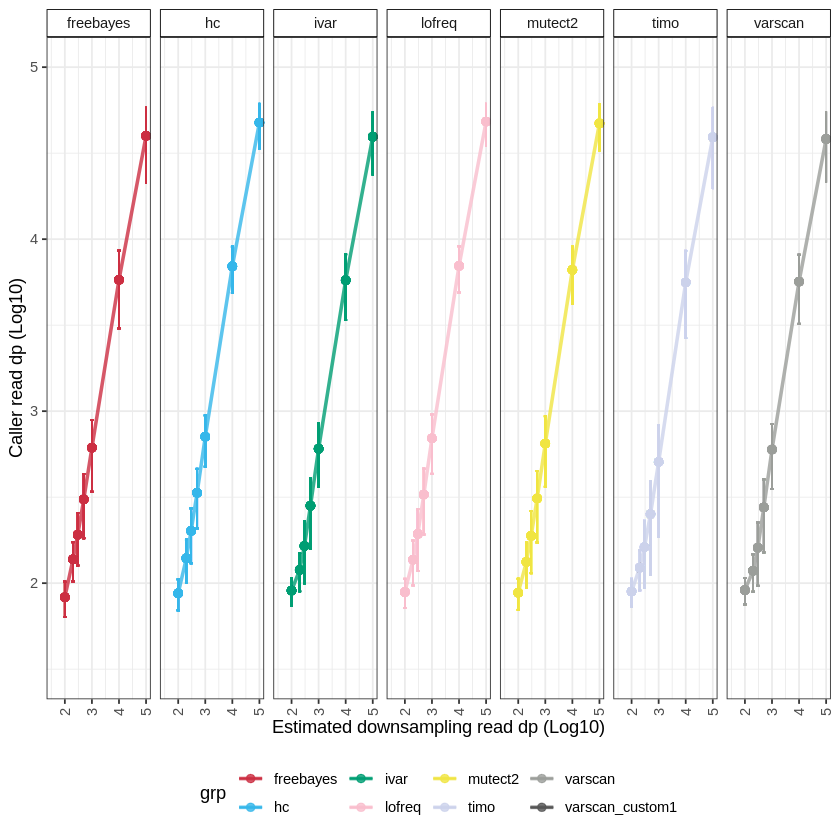

In [24]:
message("Plotting downsampling depth vs. coverage")

plot1 = vdf %>% select(seq_depth, chrom, sd_dp_tool,
                coverage, segment, min_tool_dp, max_tool_dp,
                 category,  mean_dp_tool,parameter, tool) %>% 

        filter(category == 'TP' & parameter == 'standard') %>% 
        
        unique() %>%

        ggplot(.) + 

            geom_line(aes(x=log10(coverage) , 
                            y = log10(mean_dp_tool),
                           group = tool, color = tool),size = 1, alpha = 0.8) + 

            geom_errorbar(
                aes(x= log10(coverage), 
                    ymin = log10(mean_dp_tool - sd_dp_tool), 
                    ymax = log10(mean_dp_tool + sd_dp_tool),
                   group = tool, color = tool), 
            width = 0.1) +
             
            geom_point(aes(x=log10(coverage), 
                            y = log10(mean_dp_tool), color = tool), 
                       alpha = 0.8, size = 2) + 

            xlab("Estimated downsampling read dp (Log10)") +
            
            ylab("Caller read dp (Log10)") + 
            
            facet_grid(.~tool, scales = 'free') +
            xlim(1.5,5) + 
            ylim(1.5,5) + 
            PlotTheme1 +
            labs(shape="Virus",color="SNV Caller", grp = 'SNV Caller', linetype ="Virus") + 
            caller_colScale +
            theme(legend.position="bottom")


print(plot1)

ggsave(plot1,
       filename = glue("{FIG_DIR}/figS2A_KJ.pdf"),
       width = 10,
       height = 3, limitsize=FALSE, useDingbats = FALSE)


ggsave(plot1,
       filename = glue("{FIG_DIR}/figS2A_KJ.png"),
       width = 10,
       height = 3, limitsize=FALSE)


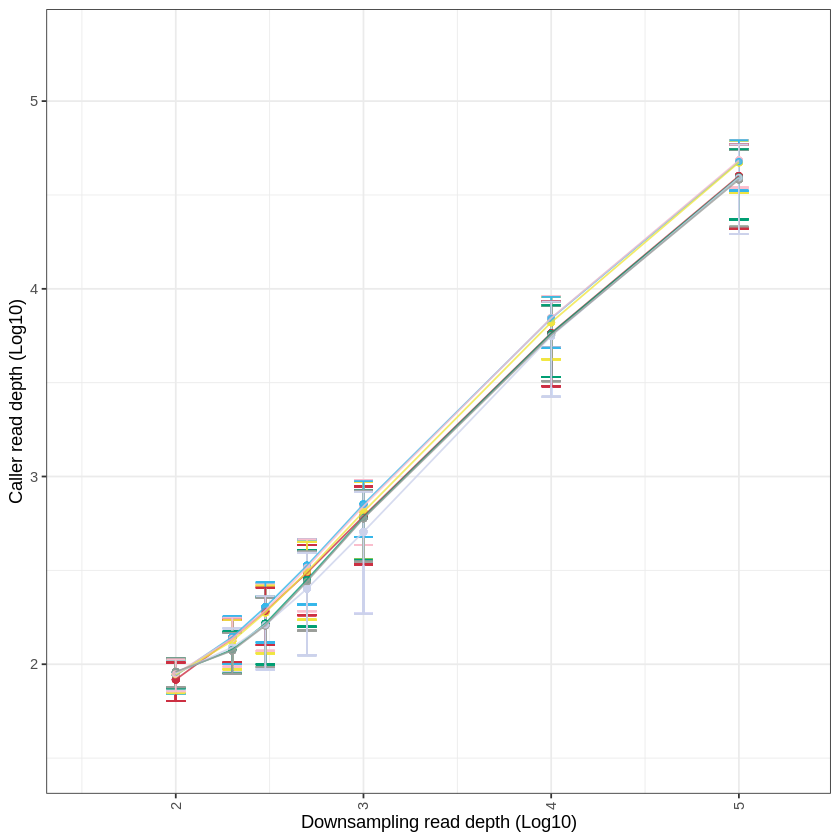

In [25]:
plot1 = vdf %>% select(seq_depth, chrom, sd_dp_tool,
                coverage, segment, min_tool_dp, max_tool_dp,
                 category,  mean_dp_tool,parameter, tool) %>% 
                      
        filter(category == 'TP' & parameter == 'standard') %>% 
        
        unique() %>%

        ggplot(.) + 

            geom_errorbar(
                aes(x= log10(coverage), 
                    ymin = log10(mean_dp_tool - sd_dp_tool), 
                    ymax = log10(mean_dp_tool + sd_dp_tool),
                   group = tool, color = tool), 
            width = 0.1) +
             
            geom_point(aes(x=log10(coverage), 
                            y = log10(mean_dp_tool), color = tool), 
                       alpha = 0.8) + 

            geom_line(aes(x=log10(coverage) , 
                            y = log10(mean_dp_tool),
                           group = tool, color = tool), alpha = 0.8) + 


            xlab("Downsampling read depth (Log10)") +
            
            ylab("Caller read depth (Log10)") + 
            xlim(1.5,5.3) + 
            ylim(1.5,5.3) + 
            PlotTheme1 +
            labs(shape="Virus",color="SNV Caller", grp = 'SNV Caller', linetype ="Virus") + 
            caller_colScale +
            theme(legend.position="none")

print(plot1)



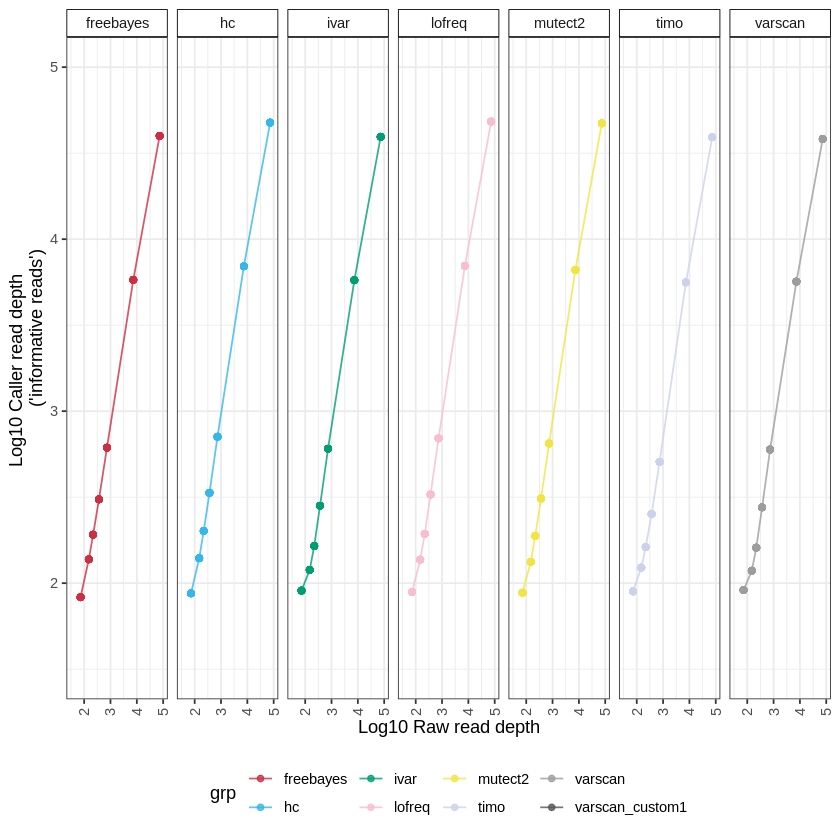

In [26]:
plot1 = vdf %>% select(seq_depth, chrom, sd_dp_tool,
                coverage, segment, min_tool_dp, max_tool_dp,
                category,  mean_dp_tool,parameter, tool, mean_tc_tool) %>% 
                       

        filter(category == 'TP' & parameter == 'standard') %>% 
        unique() %>%
        ggplot(.) + 
        geom_line(aes(x=log10(mean_tc_tool) , 
                            y = log10(mean_dp_tool),
                           group = tool, color = tool), alpha = 0.8) + 
            geom_point(aes(x=log10(mean_tc_tool), 
                            y = log10(mean_dp_tool), color = tool), 
                       alpha = 0.8) + 

            
            facet_grid(.~tool, scales = 'free') +
            xlim(1.5,5) + 
            ylim(1.5,5) + 
            ylab("Log10 Caller read depth 
                ('informative reads')") +
            xlab("Log10 Raw read depth") + 
            PlotTheme1 +
            labs(shape="Virus",color="SNV Caller", grp = 'SNV Caller', linetype ="Virus") + 
            caller_colScale + 
            theme(legend.position="bottom")

print(plot1)



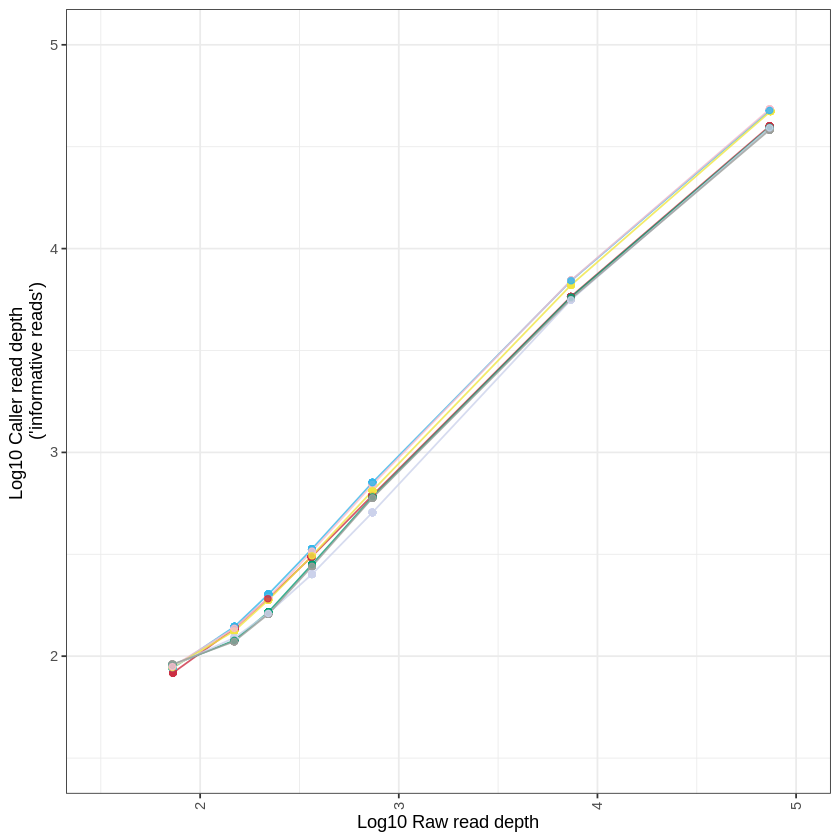

In [27]:
plot1 = vdf %>%  select(seq_depth, chrom, sd_dp_tool,
                coverage, segment, min_tool_dp, max_tool_dp,
             category,  mean_dp_tool,parameter, tool, mean_tc_tool) %>% 
                      
        filter(category == 'TP' & parameter == 'standard') %>% 
        unique() %>%
        ggplot(.) + 
            geom_line(aes(x=log10(mean_tc_tool) , 
                            y = log10(mean_dp_tool),
                           group = tool, color = tool), alpha = 0.8) + 
            geom_point(aes(x=log10(mean_tc_tool), 
                            y = log10(mean_dp_tool), color = tool), 
                       alpha = 0.8) + 
            xlim(1.5,5) + 
            ylim(1.5,5) + 
            ylab("Log10 Caller read depth 
                ('informative reads')") +
            xlab("Log10 Raw read depth") + 
            PlotTheme1 +
            labs(shape="Virus",color="SNV Caller", grp = 'SNV Caller', linetype ="Virus") + 
            caller_colScale + 
            theme(legend.position="none")

print(plot1)



In [28]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/kate/anaconda3/envs/r_env/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] glue_1.5.1      plotrix_3.8-1   forcats_0.5.1   stringr_1.4.0  
 [5] purrr_0.3.4     readr_1.4.0     tidyr_1.1.3     tibble_3.1.6   
 [9] ggplot2_3.3.5   tidyverse_1.3.1 dplyr_1.0.7     plyr_1.8.6     

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-5      tidyselect_1.1.1  repr_1.1.3      